In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy import stats

In [280]:
# Files to Load 
chicago_marathon_winners = "Chicago_Marathon_Winners.csv"
london_marathon_winners = "London_Marathon_Winners.csv"
ny_marathon_winners = "NY_Marathon_Winners.csv"
winners = 'Marathon_Winners.csv'
# Read School and Student Data File and store into Pandas Data Frames
df = pd.read_csv(winners, encoding = 'latin-1')
chi_mar_data = pd.read_csv(chicago_marathon_winners, encoding="latin-1")
#chi_mar_data
lon_mar_data = pd.read_csv(london_marathon_winners, encoding="latin-1")
ny_mar_data = pd.read_csv(ny_marathon_winners, encoding="latin-1")
marathon_data_complete = pd.merge(chi_mar_data, lon_mar_data, left_on=['YEAR','Gender'], right_on = ['Year','Gender'])
del marathon_data_complete['Year']
marathon_data_complete.rename(columns = {'Winner Name_x':'Winner Name_Chicago','Winner Country_x':'Winner Country_Chicago','Time_x':'Time_Chicago','Marathon City_x':'City_Name_Chicago','Winner Name_y':'Winner Name_London','Winner Country_y':'Winner Country_London','Time_y':'Time_London','Marathon City_y':'City_Name_London'}, inplace = True)
#marathon_data_complete
marathon_data_complete_new = pd.merge(marathon_data_complete, ny_mar_data, left_on=['YEAR','Gender'], right_on = ['YEAR','Gender'])
marathon_data_complete_new
marathon_data_complete_new.rename(columns = {'Winner Name':'Winner Name_NY','Winner Country':'Winner Country_NY','Time':'Time_NY','Marathon City':'City_Name_NY'}, inplace = True)
marathon_data_complete_new
df.head()


,YEAR,Winner Name,Winner Country,Time,Gender,Marathon City
0,1977,Dan Cloeter,USA,2:17:52,M,Chicago
1,1978,Mark Stanforth,USA,2:19:20,M,Chicago
2,1979,Dan Cloeter,USA,2:23:20,M,Chicago
3,1980,Frank Richardson,USA,2:14:04,M,Chicago
4,1981,Phil Coppess,USA,2:16:13,M,Chicago


In [281]:
# Amit's code ends here


In [282]:
# Sonal's code starts here

In [283]:
# Sonal's code ends here

In [284]:
# Brian's code starts here


In [334]:
gdp = 'gdp_data.csv'
gdp_data = pd.read_csv(gdp, encoding = 'latin-1')
gdp_data['Winner Country'] = gdp_data['Country']
gdp = gdp_data['2017']
gdp2 = pd.DataFrame(gdp)
gdp2['Winner Country'] = gdp_data['Country']
gdp2 = gdp2.rename(columns={"2017" : "GDP/CAP"})
gdp2.max()

GDP/CAP                81191
Winner Country    Yugoslavia
dtype: object

In [335]:
df_gdp = pd.merge(df, gdp2, how = 'left', on = 'Winner Country')
df_gdp.head()

,YEAR,Winner Name,Winner Country,Time,Gender,Marathon City,GDP/CAP
0,1977,Dan Cloeter,USA,2:17:52,M,Chicago,59532.0
1,1978,Mark Stanforth,USA,2:19:20,M,Chicago,59532.0
2,1979,Dan Cloeter,USA,2:23:20,M,Chicago,59532.0
3,1980,Frank Richardson,USA,2:14:04,M,Chicago,59532.0
4,1981,Phil Coppess,USA,2:16:13,M,Chicago,59532.0


In [352]:

x_data_gdp = df_gdp['YEAR']
y_data_gdp= df_gdp['GDP/CAP']
mask = ~np.isnan(x_data_gdp) & ~np.isnan(y_data_gdp)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_data_gdp[mask], y_data_gdp[mask])
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(pvalue)

4.6165677252211675e-27


Text(1985, 65000, 'y = -1404.15x + 2830927.88')

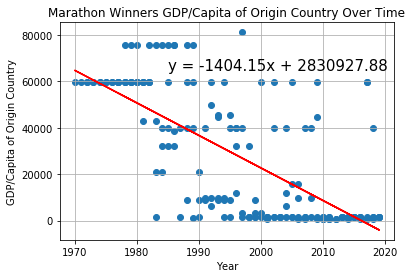

In [337]:
plt.scatter(x_data_gdp,y_data_gdp )
plt.title('Marathon Winners GDP/Capita of Origin Country Over Time')
plt.xlabel('Year')
plt.ylabel('GDP/Capita of Origin Country')
plt.grid()
plt.plot(x_data_gdp,regress_values,"r-")
plt.annotate(line_eq,(1985,65000),fontsize=15,color="black")



In [338]:
gini = 'gini_data.csv'
gini_data = pd.read_csv(gini, encoding = 'latin-1')
gini_data['Winner Country'] = gini_data['Country']
gini = gini_data['GINI']
gini2 = pd.DataFrame(gini)
gini2['Winner Country'] = gdp_data['Country']
gini2.head()



,GINI,Winner Country
0,40.8,Kenya
1,35.0,Ethiopia
2,41.5,USA
3,33.2,UK
4,32.1,Japan


In [339]:
df_gini = pd.merge(df, gini2, how = 'left', on = 'Winner Country')
df_gini.head()

,YEAR,Winner Name,Winner Country,Time,Gender,Marathon City,GINI
0,1977,Dan Cloeter,USA,2:17:52,M,Chicago,41.5
1,1978,Mark Stanforth,USA,2:19:20,M,Chicago,41.5
2,1979,Dan Cloeter,USA,2:23:20,M,Chicago,41.5
3,1980,Frank Richardson,USA,2:14:04,M,Chicago,41.5
4,1981,Phil Coppess,USA,2:16:13,M,Chicago,41.5


In [353]:
x_data_gini = df_gini['YEAR']
y_data_gini= df_gini['GINI']
mask = ~np.isnan(x_data_gini) & ~np.isnan(y_data_gini)
(slope_g, intercept_g, rvalue_g, pvalue_g, stderr_g) = stats.linregress(x_data_gini[mask], y_data_gini[mask])
regress_values_gini = x_data_gini * slope_g + intercept_g
line_eq_gini = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(pvalue_g)


0.5542831615073762


Text(1970, 55, 'y = -1404.15x + 2830927.88')

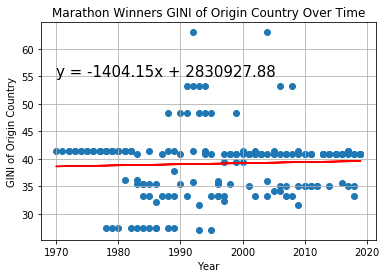

In [354]:
plt.scatter(x_data_gini,y_data_gini )
plt.title('Marathon Winners GINI of Origin Country Over Time')
plt.xlabel('Year')
plt.ylabel('GINI of Origin Country')
plt.grid()
plt.plot(x_data_gini,regress_values_gini,"r-")
plt.annotate(line_eq_gini,(1970,55),fontsize=15,color="black")

In [342]:
# Brian's code ends here

In [321]:
# Olga's code starts here

In [ ]:
# Olga's code ends here